In [1]:
library("rjson")
library(igraph)
library(data.table)
#


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [ ]:
###Make sure you run the preprocess note

In [2]:
jsonFile = read.table("processed.csv",sep="|",quote="")

In [3]:
gData<-fread(file="processedGraph.txt",data.table = TRUE)

In [4]:
g <- read.graph('processedGraph.txt',directed = FALSE, format=c("ncol"), weights='yes')

In [5]:
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))

In [6]:
g.components$csize

[1] 1880    5    2

In [7]:
#Question 6
print(vcount(g.giant))
print(ecount(g.giant))

[1] 1880
[1] 311802


In [8]:
#Question 7
m1<-mst(g.giant)

In [9]:
#Question 7
print(jsonFile[which(jsonFile$"V1"==2),]$"V2")
print(jsonFile[which(jsonFile$"V1"==1470),]$"V2")
print(jsonFile[which(jsonFile$"V1"==6),]$"V2")
print(jsonFile[which(jsonFile$"V1"==366),]$"V2")
print(jsonFile[which(jsonFile$"V1"==8),]$"V2")
print(jsonFile[which(jsonFile$"V1"==2001),]$"V2")
print(jsonFile[which(jsonFile$"V1"==11),]$"V2")
print(jsonFile[which(jsonFile$"V1"==1663),]$"V2")
print(jsonFile[which(jsonFile$"V1"==16),]$"V2")
print(jsonFile[which(jsonFile$"V1"==2111),]$"V2")

[1] 400 Northumberland Avenue, Redwood Oaks, Redwood City
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 1500 Oxford Street, Palm Park, Redwood City
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 100 Carlsbad Circle, Vacaville
2704 Levels: 0 12th East Street, Pittsburg ...
[1] Interstate 505, Vacaville
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 700 Carlsbad Court, Petaluma
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 900 Telford Lane, Petaluma
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 0 Mesa Vista Court, San Ramon
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 1400 Sheridan Avenue, South Cirby, Roseville
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 600 9th Street, Pacific Grove
2704 Levels: 0 12th East Street, Pittsburg ...
[1] 200 Locust Street, Pacific Grove
2704 Levels: 0 12th East Street, Pittsburg ...


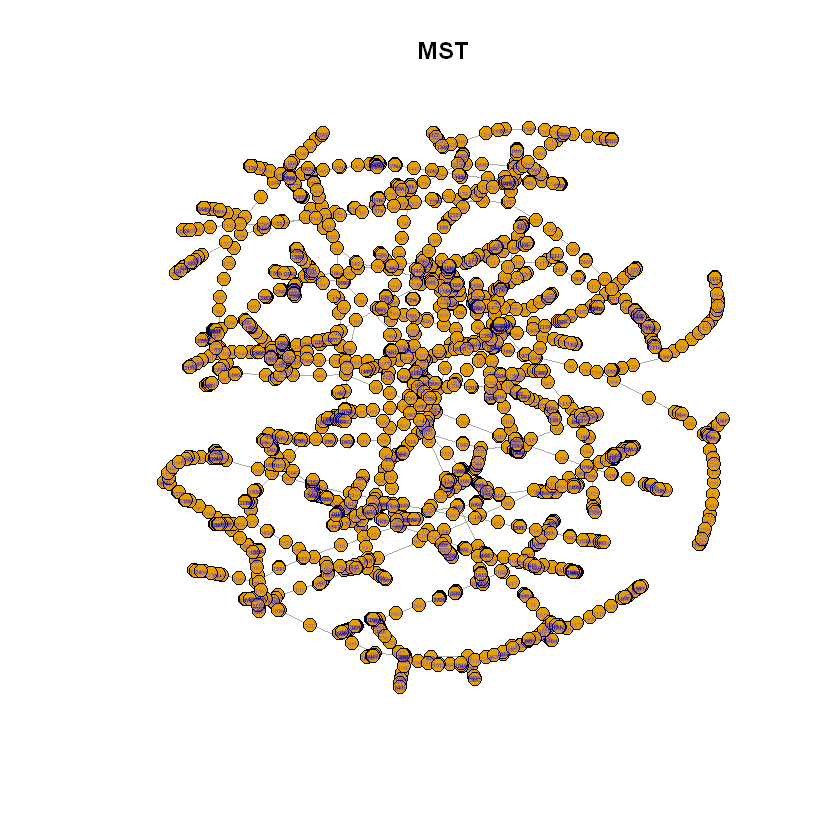

In [14]:
plot(m1,vertex.size=5, vertex.label.cex=0.3,main="MST")

In [38]:
ecount(m1)

[1] 1879

In [13]:

tt<-triangles(g.giant)
cc<-length(tt)/3


In [ ]:
#Question 8
count<-0
counter<-0
#aaa<- sample(cc,100)
for (n in  1:1000){
    first<-tt[[n*3+1]]
    second<-tt[[n*3+2]]
    third<-tt[[n*3+3]]
    d1<-E(g.giant)$weight[get.edge.ids(g.giant,c(first,second))]        
    if(d1==0)
        d1<-shortest.paths(g.giant,first,second)
    d2<-E(g.giant)$weight[get.edge.ids(g.giant,c(first,third))]        
    if(d2==0)
        d2<-shortest.paths(g.giant,first,third)
    d3<-E(g.giant)$weight[get.edge.ids(g.giant,c(third,second))]        
    if(d3==0)
        d3<-shortest.paths(g.giant,second,third)
    if((d1+d2>d3) && (d1+d3>d2)&& (d2+d3>d1))
       count<-count+1
    counter<-counter+1
}

In [41]:
count

[1] 765